# Deep Learning

## HW1- Problem 3 - Regression (100 pts)

### Please fill this part


1.   Full Name: Ehsanollah Shourezari
2.   Student Number: 400206295


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [318]:
# You are not allowed to import other packages.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

#my own code

from google.colab import files
import io
uploaded = files.upload()

#my own code

Saving data01.csv to data01 (5).csv


### Part1:
Consider the dataset which has been given to you. Split the dataset into the `training dataset` and `test dataset`. You can use `80%` of the data for training and the rest for testing.

In [319]:
dataset = pd.read_csv(io.BytesIO(uploaded['data01.csv']))

# implement the split part
# name them: x_train, x_test, y_train, y_test
dataset = dataset.to_numpy()

idx_r = np.random.choice(len(dataset),len(dataset), replace=False)
idx_r_tr = idx_r[:int(len(dataset) * 0.8)]
idx_r_te =  idx_r[int(len(dataset) * 0.8):]

train = dataset[idx_r_tr]
test  = dataset[idx_r_te]

x_train = np.reshape(train[: , 1], (-1, 1))
y_train = np.reshape(train[: , 2], (-1, 1))

x_test = np.reshape(test[:,1], (-1, 1))
y_test = np.reshape(test[:,2], (-1, 1))

### Part2:
Assume there is simple linear relationship between X and Y. Train a simple `Linear Regression` on the training dataset and report its accuracy on the training and testing dataset, separately.

In [320]:
# here you can implement via sgd or use least square solution. we suggest the second one inv(A^T A) * A^T y.
# consider m as the returned line --> m[0] = the slope , m[1] = y intercept, also don't forget to use numpy for calculating m.
A = np.column_stack((x_train,np.ones((len(x_train),1))))
m = np.matmul(np.matmul(np.linalg.inv(np.matmul(A.T,A)),A.T),y_train)

In [321]:
predicted_train_y = m[0] * x_train + m[1]
predicted_test_y = m[0] * x_test + m[1]

train_error = mean_squared_error(predicted_train_y , y_train)
test_error = mean_squared_error(predicted_test_y , y_test)

print(f"MSE train error: {train_error}\nMSE test error: {test_error}")

MSE train error: 0.33290625285424574
MSE test error: 0.32385721282731394


### Part3:
Draw the line you've found in the last part, on train and test points (each separately).

Text(0.5, 1.0, 'Train dataset')

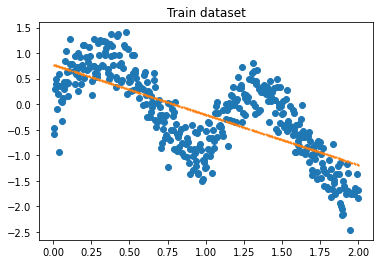

In [322]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, m[0]*x_train + m[1], s=1)
plt.title("Train dataset")

Text(0.5, 1.0, 'Test dataset')

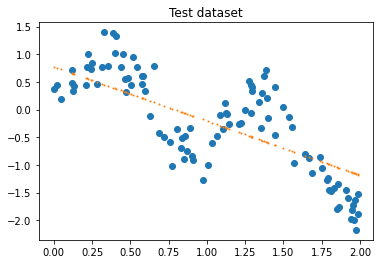

In [323]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, m[0]*x_test + m[1], s=1)
plt.title("Test dataset")

### Part4:
Were the reported accuracies acceptable? 

What about the line you drew in the last part? 

Was it appropriate for the dataset?
<br><br/>
Explain what are the main problems here.

Our labels varianc is about 0.68. So, the reported accuracies were not acceptable.

It dosn't fit properly to our data. Because the data hasn't linear model actually.

As said the data has a complex modl than linear and UnderFitting has occured. 


### Part5:
Now, consider the `Locally Weighted Linear Regression` approach for this problem. Do expect it performs better than simple `Linear Regression` for this dataset?

Yes because it fits a spcecific line for each data.(It is almost a non-parametric algorithm). And for each data the line fits according to its neighbours.

### Part6:
Here, we want to implement the `suggested model`. You can implement any weight function you want, the below implementation is just a sample:
<br><br/>
\begin{equation*}
    w^{(i)}=exp\left(-\frac{(\mathbf x^{(i)}-\mathbf x)^\top(\mathbf x^{(i)}-\mathbf x)}{2\tau^2}\right)
\end{equation*}

In [324]:
def get_weight_matrix(the_query_point, train_dataset, hyperparameter):
    l = train_dataset.shape[0]
    W = np.mat(np.eye(l))
    for i, xi in enumerate(train_dataset):
        W[i, i] = np.exp(-np.sum((the_query_point-xi)**2 )/(2*hyperparameter**2))
    return W

Now implement the `closed form solution` based on the following formula:
<br><br/>
\begin{equation*}
    \boldsymbol\theta=(X^\top WX)^{-1}(X^\top WY)
\end{equation*}
<br><br/>
Of course if you use another form, implement your own.

In [325]:
def predict(train_X, train_Y, query_x, hyperparameter):
    l = train_X.shape[0]
    X = np.hstack((train_X, np.ones((l, 1))))
    qx = np.hstack((query_x, 1))
    W = get_weight_matrix(qx, X, hyperparameter)

    theta = np.linalg.pinv(X.T @ W @ X ) @ (X.T @ W @ train_Y)
    return np.dot(qx, theta) 

### Part7:
Report accuracy of this model on the test dataset. Also, draw a plot that contains (x_test, y_test) pairs and (x_test, predicted_y) pairs that differ in color.

In [326]:
hyperparameter = 0.02
predicted_test = [predict(x_train, y_train, query, hyperparameter) for query in x_test]
predicted_test = np.array(predicted_test)[:,0]
error = mean_squared_error(predicted_test , y_test)
print(f"MSE test error: {error}")

MSE test error: 0.07766653089898598


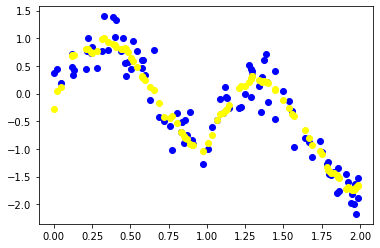

In [327]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_test, c="yellow")

### Part8:
Is the performance of the new model better than the previous one? `Explain`.

Yes, Because th nighbour points has more weigts in the inference stage. Also the algorithm has a more computational cost, because for each data, it fits an individually line.

### Part9:
Now, we want to consider the `KNN` approach for this problem; Do you think it will perform well?

It is almost like the LWLR. Because it also care the nearest points and weights them more than other points. So, it can perform well.

### Part10:
Implementing the `KNN model`.

In [328]:
class KNN:
    def __init__(self, number_neighbours, X, Y):
        self.k = number_neighbours
        self.X = X
        self.Y = Y

    def distance(self, x1, x2):
        distance = np.linalg.norm(x1-x2)**2 # implement the distance function
        return distance

    def return_nn_ids(self, x):

        dis_all = [self.distance(x, y) for y in self.X]
        dis_all = np.array(dis_all)
        dis_all = np.column_stack((dis_all,np.arange(len(dis_all))))

        dis_all = dis_all[dis_all[:, 0].argsort()]
        indices = dis_all[0:k,1]

        return indices.astype(int)

    def predict(self, x):
        neareest_indices = self.return_nn_ids(x)
        predicted_y = np.mean(self.Y[neareest_indices])
        return predicted_y

In [329]:
def evaluation(k, x_train, y_train, x_test, y_test):
    model = KNN(k, x_train, y_train)
    predicted_y = [model.predict(x) for x in x_test]
    predicted_y = np.array(predicted_y)
    error = mean_squared_error(y_test, predicted_y)
    return error, predicted_y

In [330]:
k = 6
error_knn, predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
print(f"MSE error of KNN for test dataset: {error_knn}")

MSE error of KNN for test dataset: 0.0820097121647729


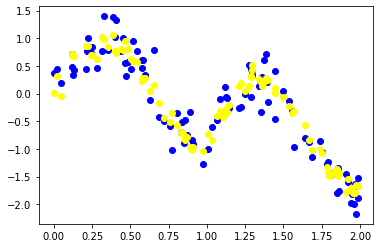

In [331]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_y, c="yellow")

To find best K for this algorithm we suggest to use cross-validation.
<br><br/>
Did this model perform well (due to the plot and test accuracy)?

Yes, it performs well respect to linear regrssor and has approximately same performance as LWLR. The biggest challenge is that for the test data out of the range that training data puts in, it will have zero slope. (because the nearest neighbours remains constant).